## 0. gym environment

In [196]:
!pip install gym

In [197]:
import gym
import numpy as np
from gym import spaces
import matplotlib.pyplot as plt
from google.colab import widgets
import time

In [198]:
grid = np.zeros((4,4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [199]:
grid = np.zeros((4, 4))
pos1 = [0, 0]
pos2 = [3, 3]

reward1 = [0,3]
reward2 = [1,3]
reward3 = [2,2]
reward4 = [3,2]

grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5
grid[tuple(reward1)] = 0.25
grid[tuple(reward2)] = 0.25
grid[tuple(reward3)] = 0.25
grid[tuple(reward4)] = 0.25

print(grid)

[[1.   0.   0.   0.25]
 [0.   0.   0.   0.25]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.25 0.5 ]]


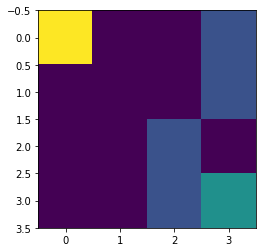

In [200]:
plt.imshow(grid)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

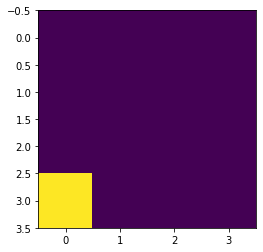

<IPython.core.display.Javascript object>

In [201]:
from google.colab import widgets
import time

output_grid = widgets.Grid(1, 1)
for _ in range(5):
  grid = np.zeros((4, 4))
  grid[np.random.randint(4), np.random.randint(4)] = 1
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(1)

##1. Deterministic Environment

In [202]:
class DGridEnvironment(gym.Env):
    metadata = {'render.modes': []}
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timestep = 50000
        self.rewards = [[0,3],[1,3],[2,2],[3,2]]
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        for i in self.rewards :
          self.state[tuple(i)] = 0.25
        observation = self.agent_pos #I changed it self.state.flatten() to self.agent_pos to use it in algorithm
        return observation
    
    def step(self, action):
        if action == 0:           
          self.agent_pos[0] += 1 #down
          if self.agent_pos[0] > 3:
            self.agent_pos[0] = 3 
        if action == 1:           
          self.agent_pos[0] -= 1 #up
          if self.agent_pos[0] < 0:
            self.agent_pos[0] = 0 
        if action == 2:
          self.agent_pos[1] += 1 #right
          if self.agent_pos[1] > 3:
            self.agent_pos[1] = 3
        if action == 3:
          self.agent_pos[1] -= 1 #left
          if self.agent_pos[1] < 0:
            self.agent_pos[1] = 0  

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        for i in self.rewards :
          self.state[tuple(i)] = 0.25
        observation = self.agent_pos #I changed it self.state.flatten() to self.agent_pos to use it in algorithm
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
          reward = 5
        elif (self.agent_pos == self.rewards[0]).all():
          reward = 1
        elif (self.agent_pos == self.rewards[1]).all():
          reward = 2
        elif (self.agent_pos == self.rewards[2]).all():
          reward = 3
        elif (self.agent_pos == self.rewards[3]).all():
          reward = 4
        else:
          reward = -0.1
        
        self.timestep += 1
        done = True if self.timestep >= self.max_timestep or (self.agent_pos == self.goal_pos).all() else False
        info = {}
        
        return observation, reward, done, info
        
    def render(self):
        plt.imshow(self.state)

In [203]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

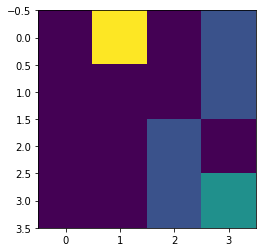

<IPython.core.display.Javascript object>

In [204]:
env = DGridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()


for i in range(100):
  action = agent.step(obs)
  obs, reward, done, _= env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()

##2. Stochastic Environment

In [205]:
class SGridEnvironment (gym.Env): 
    metadata = {'render.modes': []}

    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timestep = 50000
        self.rewards = [[0,3],[1,3],[2,2],[3,2]]
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        for i in self.rewards :
          self.state[tuple(i)] = 0.25
        observation = self.agent_pos
        return observation

    def step(self, action):
      s = np.random.random()

      if action == 0: #down
        if s < 0.55:
          self.agent_pos[0] += 1 # down
          if self.agent_pos[0] > 3:
            self.agent_pos[0] = 3
        elif s < 0.7:
          self.agent_pos[0] -= 1 # up
          if self.agent_pos[0] < 0:
            self.agent_pos[0] = 0 
        elif s < 0.85 :
          self.agent_pos[1] += 1  # right
          if self.agent_pos[1] > 3:
            self.agent_pos[1] = 3
        else:
          self.agent_pos[1] -= 1 # left
          if self.agent_pos[1] < 0:
            self.agent_pos[1] = 0 
              
      elif action == 1: #up 
        if s < 0.55:
          self.agent_pos[0] -= 1 # up
          if self.agent_pos[0] < 0:
            self.agent_pos[0] = 0 
        elif s < 0.7:
          self.agent_pos[0] += 1 # down
          if self.agent_pos[0] > 3:
            self.agent_pos[0] = 3
        elif s < 0.85 :
          self.agent_pos[1] += 1  # right
          if self.agent_pos[1] > 3:
            self.agent_pos[1] = 3
        else:
          self.agent_pos[1] -= 1 # left
          if self.agent_pos[1] < 0:
            self.agent_pos[1] = 0 
    
      elif action == 2: #right 
        if s < 0.55 :
          self.agent_pos[1] += 1 # right
          if self.agent_pos[1] > 3:
            self.agent_pos[1] = 3
        elif s < 0.7 :
          self.agent_pos[1] -= 1 # left
          if self.agent_pos[1] < 0:
            self.agent_pos[1] = 0 
        elif s < 0.85 :
          self.agent_pos[0] += 1  # down
          if self.agent_pos[0] > 3:
            self.agent_pos[0] = 3
        else:
          self.agent_pos[0] -= 1 # up
          if self.agent_pos[0] < 0:
            self.agent_pos[0] = 0 
              
      elif action == 3: #left 
        if s < 0.55 :
          self.agent_pos[1] -= 1 # left 
          if self.agent_pos[1] < 0:
            self.agent_pos[1] = 0 
        elif s < 0.7 :
          self.agent_pos[1] += 1 # right 
          if self.agent_pos[1] > 3:
            self.agent_pos[1] = 3
        elif s < 0.85 :
          self.agent_pos[0] += 1  # down
          if self.agent_pos[0] > 3:
            self.agent_pos[0] = 3
        else:
          self.agent_pos[0] -= 1 # up
          if self.agent_pos[0] < 0:
            self.agent_pos[0] = 0 

      self.agent_pos = np.clip(self.agent_pos, 0, 3)
      self.state = np.zeros((4,4))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.5
      for i in self.rewards :
          self.state[tuple(i)] = 0.25
      observation = self.agent_pos
      
      reward = 0
      if reward == 0 :          
        if (self.agent_pos == self.goal_pos).all():
          reward = 5
        elif (self.agent_pos == self.rewards[0]).all():
          reward = 1
        elif (self.agent_pos == self.rewards[1]).all():
          reward = 2
        elif (self.agent_pos == self.rewards[2]).all():
          reward = 3
        elif (self.agent_pos == self.rewards[3]).all():
          reward = 4
        else:
          reward = -0.1

      self.timestep += 1
      done = True if self.timestep >= self.max_timestep or (self.agent_pos == self.goal_pos).all() else False
      info = {}
          
      return observation, reward, done, info
          
    def render(self):
        plt.imshow(self.state)

In [206]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

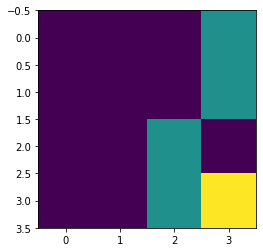

<IPython.core.display.Javascript object>

In [207]:
env = SGridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

for i in range(100):
  action = agent.step(obs)
  env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()

## 3. Q-learning in Deterministic environment

In [238]:
import numpy as np

#Q_table
Q = np.zeros([16,4])

q_d_rewards = []
q_d_epsilon_decay = []
q_d_episode_list = []
episode = 500

#parameter
decay = 0.99
epsilon = 1
alpha = 1
gamma = 0.9

output_grid = widgets.Grid(1, 1)

""


In [239]:
import pandas as pd

qd_env = DGridEnvironment()
observation_space = qd_env.observation_space
action_space = qd_env.action_space

#repeat for each episode 
for ep in range(1,episode+1):

  #observe the initial state s 
  obs = qd_env.reset()
  done = False
  epsilon = epsilon * decay
  
  cumulative_rewards = 0
  #repeat for each step of episode
  while not done:

    state = 4*obs[0] + obs[1]
    #select an action a from state s(e.g. epsilon-greedy) and execute it
    if np.random.random() < epsilon: 
      action = np.random.choice(action_space.n) #exploration 
    else:
      action = np.argmax(Q[state,:]) #exploit

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = qd_env.step(action)
    
    #Update the table entry for Q(s,a) as follows:
    next_state = 4*next_obs[0]+next_obs[1]
    Q[state,action] = Q[state,action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state,action])
    cumulative_rewards += reward
    obs = next_obs

    
  
  if (ep-1)%20 == 0:
    print("--------------------------------")  
    print('episode:',ep)  
    print('epsilon:',epsilon)
    print('rewards:',cumulative_rewards)
    
  q_d_episode_list.append(ep)
  q_d_epsilon_decay.append(epsilon)
  q_d_rewards.append(cumulative_rewards)
  
    

qd_env.close()


--------------------------------
episode: 1
epsilon: 0.99
rewards: 14.8
--------------------------------
episode: 21
epsilon: 0.8097278682212583
rewards: 13.6
--------------------------------
episode: 41
epsilon: 0.6622820409839835
rewards: 148.00000000000006
--------------------------------
episode: 61
epsilon: 0.5416850759668536
rewards: 8.1
--------------------------------
episode: 81
epsilon: 0.44304798162617254
rewards: 12.4
--------------------------------
episode: 101
epsilon: 0.36237201786049694
rewards: 72.99999999999999
--------------------------------
episode: 121
epsilon: 0.2963865873992079
rewards: 76.0
--------------------------------
episode: 141
epsilon: 0.24241664604458016
rewards: 73.5
--------------------------------
episode: 161
epsilon: 0.19827425658891445
rewards: 50.5
--------------------------------
episode: 181
epsilon: 0.16216989001100657
rewards: 50.7
--------------------------------
episode: 201
epsilon: 0.13263987810938213
rewards: 189.5
-------------------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

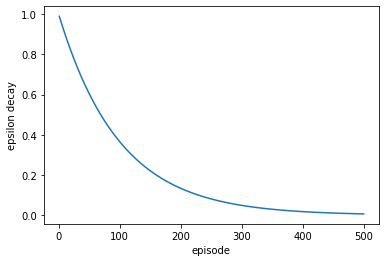

<IPython.core.display.Javascript object>

In [229]:
#epsilon decay per episode 
with output_grid.output_to(0, 0):
  plt.plot(q_d_episode_list,q_d_epsilon_decay)
  plt.xlabel("episode")
  plt.ylabel("epsilon decay")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

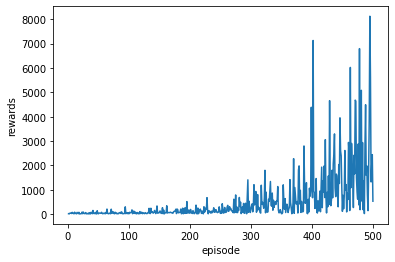

<IPython.core.display.Javascript object>

In [240]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(q_d_episode_list,q_d_rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

##4. Q-learning in Stochastic environment

In [266]:
import numpy as np

#Q_table
Q = np.zeros([16,4])

q_s_rewards = []
q_s_epsilon_decay = []
q_s_episode_list = []
episode = 500

#parameter
decay = 0.99 
epsilon = 1
alpha = 1
gamma = 0.9

output_grid = widgets.Grid(1, 1)

""


In [267]:
import pandas as pd

qs_env = SGridEnvironment()
observation_space = qs_env.observation_space
action_space = qs_env.action_space

#repeat for each episode 
for ep in range(1,episode+1):

  #observe the initial state s 
  obs = qs_env.reset()
  done = False
  epsilon = epsilon * decay
  
  cumulative_rewards = 0
  #repeat for each step of episode
  while not done:

    state = 4*obs[0] + obs[1]
    #select an action a from state s(e.g. epsilon-greedy) and execute it
    if np.random.random() < epsilon: 
      action = np.random.choice(action_space.n) #exploration 
    else:
      action = np.argmax(Q[state,:]) #exploit

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = qs_env.step(action)
    
    #Update the table entry for Q(s,a) as follows:
    next_state = 4*next_obs[0]+next_obs[1]
    Q[state,action] = Q[state,action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state,action])
    cumulative_rewards += reward
    obs = next_obs

    
  
  if (ep-1)%20 == 0:
    print("--------------------------------")  
    print('episode:',ep)  
    print('epsilon:',epsilon)
    print('rewards:',cumulative_rewards)
    
  q_s_episode_list.append(ep)
  q_s_epsilon_decay.append(epsilon)
  q_s_rewards.append(cumulative_rewards)
  
    

qs_env.close()


--------------------------------
episode: 1
epsilon: 0.99
rewards: 11.200000000000003
--------------------------------
episode: 21
epsilon: 0.8097278682212583
rewards: 11.2
--------------------------------
episode: 41
epsilon: 0.6622820409839835
rewards: 78.40000000000026
--------------------------------
episode: 61
epsilon: 0.5416850759668536
rewards: 18.200000000000003
--------------------------------
episode: 81
epsilon: 0.44304798162617254
rewards: 7.800000000000001
--------------------------------
episode: 101
epsilon: 0.36237201786049694
rewards: 54.1
--------------------------------
episode: 121
epsilon: 0.2963865873992079
rewards: 51.09999999999998
--------------------------------
episode: 141
epsilon: 0.24241664604458016
rewards: 28.0
--------------------------------
episode: 161
epsilon: 0.19827425658891445
rewards: 34.99999999999999
--------------------------------
episode: 181
epsilon: 0.16216989001100657
rewards: 21.4
--------------------------------
episode: 201
epsilon: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

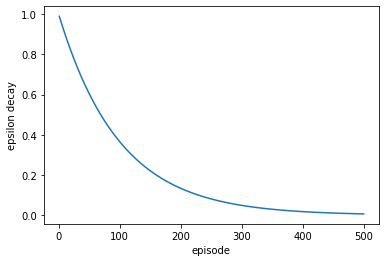

<IPython.core.display.Javascript object>

In [268]:
#epsilon decay per episode 
with output_grid.output_to(0, 0):
  plt.plot(q_s_episode_list,q_s_epsilon_decay)
  plt.xlabel("episode")
  plt.ylabel("epsilon decay")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

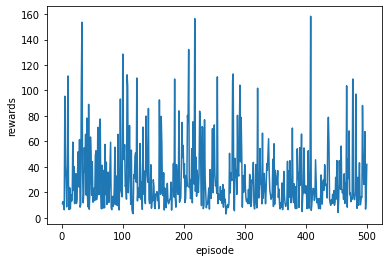

<IPython.core.display.Javascript object>

In [269]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(q_s_episode_list,q_s_rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

## 5. SARSA in Deterministic environment

In [289]:
import numpy as np

#Q_table
Q = np.zeros([16,4])

s_d_rewards = []
s_d_epsilon_decay = []
s_d_episode_list = []
episode = 500

#parameter
decay = 0.99
epsilon = 1
alpha = 1
gamma = 0.9 

output_grid = widgets.Grid(1, 1)

""


In [290]:
import pandas as pd

sd_env = DGridEnvironment()
observation_space = sd_env.observation_space
action_space = sd_env.action_space

#repeat for each episode 
for ep in range(1,episode+1):

  #observe the initial state s 
  obs = sd_env.reset()
  done = False
  epsilon = epsilon * decay 
  
  state = 4*obs[0] + obs[1]
  #Choose A from S using policy derived from Q(e-greedy)
  if np.random.random() > epsilon: 
    action = np.argmax(Q[state,:]) #exploit 
  else:
    action = np.random.choice(action_space.n) #exploration

  cumulative_rewards = 0
  #repeat for each step of episode
  while not done:

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = sd_env.step(action)

    next_state = 4*next_obs[0]+next_obs[1]
    #select an action' a from state s'(e.g. epsilon-greedy) and execute it
    if np.random.random() > epsilon: 
      next_action = np.argmax(Q[next_state,:]) #exploit 
    else:
      next_action = np.random.choice(action_space.n) #exploration


    #Update the table entry for Q(s,a) as follows:
    
    Q[state,action] = Q[state,action] + alpha*(reward + gamma*Q[next_state,next_action] - Q[state,action])
    cumulative_rewards += reward
    obs = next_obs
    action = next_action
    
  print("--------------------------------")  
  print('episode:',ep)  
  print('epsilon:',epsilon)
  print('rewards:',cumulative_rewards)
  
  s_d_episode_list.append(ep)
  s_d_epsilon_decay.append(epsilon)
  s_d_rewards.append(cumulative_rewards)
  
    

sd_env.close()


--------------------------------
episode: 1
epsilon: 0.99
rewards: 9.6
--------------------------------
episode: 2
epsilon: 0.9801
rewards: 25.699999999999996
--------------------------------
episode: 3
epsilon: 0.9702989999999999
rewards: 26.000000000000014
--------------------------------
episode: 4
epsilon: 0.96059601
rewards: 59.09999999999999
--------------------------------
episode: 5
epsilon: 0.9509900498999999
rewards: 12.2
--------------------------------
episode: 6
epsilon: 0.9414801494009999
rewards: 40.59999999999998
--------------------------------
episode: 7
epsilon: 0.9320653479069899
rewards: 27.0
--------------------------------
episode: 8
epsilon: 0.92274469442792
rewards: 21.299999999999997
--------------------------------
episode: 9
epsilon: 0.9135172474836407
rewards: 18.3
--------------------------------
episode: 10
epsilon: 0.9043820750088043
rewards: 9.299999999999999
--------------------------------
episode: 11
epsilon: 0.8953382542587163
rewards: 6.9
---------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

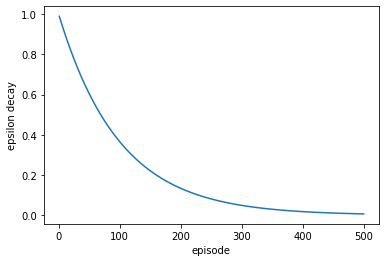

<IPython.core.display.Javascript object>

In [286]:
#epsilon decay per episode 
with output_grid.output_to(0, 0):
  plt.plot(s_d_episode_list,s_d_epsilon_decay)
  plt.xlabel("episode")
  plt.ylabel("epsilon decay")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

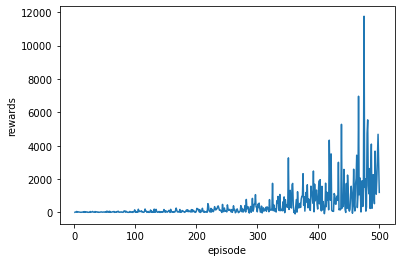

<IPython.core.display.Javascript object>

In [291]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(s_d_episode_list,s_d_rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

##6. SARSA in Stochastic environment

In [220]:
import numpy as np

#Q_table
Q = np.zeros([16,4])

s_s_rewards = []
s_s_epsilon_decay = []
s_s_episode_list = []
episode = 500

#parameter
decay = 0.99
epsilon = 1
alpha = 1
gamma = 0.9 

output_grid = widgets.Grid(1, 1)

""


In [221]:
import pandas as pd

ss_env = SGridEnvironment()
observation_space = ss_env.observation_space
action_space = ss_env.action_space

#repeat for each episode 
for ep in range(1,episode+1):

  #observe the initial state s 
  obs = ss_env.reset()
  done = False
  epsilon = epsilon * decay 
  
  state = 4*obs[0] + obs[1]
  #Choose A from S using policy derived from Q(e-greedy)
  if np.random.random() > epsilon: 
    action = np.argmax(Q[state,:]) #exploit 
  else:
    action = np.random.choice(action_space.n) #exploration

  cumulative_rewards = 0
  #repeat for each step of episode
  while not done:

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = ss_env.step(action)

    next_state = 4*next_obs[0]+next_obs[1]
    #select an action' a from state s'(e.g. epsilon-greedy) and execute it
    if np.random.random() > epsilon: 
      next_action = np.argmax(Q[next_state,:]) #exploit 
    else:
      next_action = np.random.choice(action_space.n) #exploration


    #Update the table entry for Q(s,a) as follows:
    
    Q[state,action] = Q[state,action] + alpha*(reward + gamma*Q[next_state,next_action] - Q[state,action])
    cumulative_rewards += reward
    obs = next_obs
    action = next_action
    
  print("--------------------------------")  
  print('episode:',ep)  
  print('epsilon:',epsilon)
  print('rewards:',cumulative_rewards)
  
  s_s_episode_list.append(ep)
  s_s_epsilon_decay.append(epsilon)
  s_s_rewards.append(cumulative_rewards)
  
    

ss_env.close()


--------------------------------
episode: 1
epsilon: 0.99
rewards: 43.80000000000001
--------------------------------
episode: 2
epsilon: 0.9801
rewards: 16.500000000000004
--------------------------------
episode: 3
epsilon: 0.9702989999999999
rewards: 42.899999999999885
--------------------------------
episode: 4
epsilon: 0.96059601
rewards: 9.6
--------------------------------
episode: 5
epsilon: 0.9509900498999999
rewards: 15.9
--------------------------------
episode: 6
epsilon: 0.9414801494009999
rewards: 14.4
--------------------------------
episode: 7
epsilon: 0.9320653479069899
rewards: 11.700000000000003
--------------------------------
episode: 8
epsilon: 0.92274469442792
rewards: 11.80000000000001
--------------------------------
episode: 9
epsilon: 0.9135172474836407
rewards: 7.3
--------------------------------
episode: 10
epsilon: 0.9043820750088043
rewards: 19.500000000000007
--------------------------------
episode: 11
epsilon: 0.8953382542587163
rewards: 118.900000000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

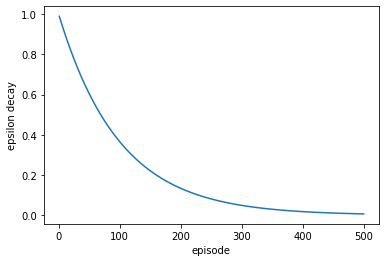

<IPython.core.display.Javascript object>

In [222]:
#epsilon decay per episode 
with output_grid.output_to(0, 0):
  plt.plot(s_s_episode_list,s_s_epsilon_decay)
  plt.xlabel("episode")
  plt.ylabel("epsilon decay")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

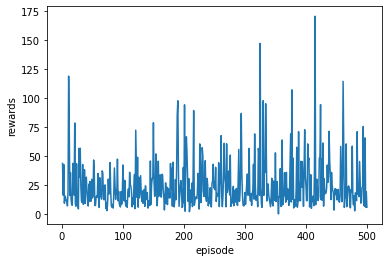

<IPython.core.display.Javascript object>

In [223]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(s_s_episode_list,s_s_rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

##7. Evaluation Results

Deterministic Q Learning

In [262]:
ev_qd_rewards = []
ev_qd_episode = []

episode = 10 

#repeat for each episode 
for ep in range(1,episode+1):

  #observe the initial state s 
  obs = qd_env.reset()
  done = False
  
  cumulative_rewards = 0
  #repeat for each step of episode
  while not done:

    state = 4*obs[0] + obs[1]
    #select an action a from state s(e.g. epsilon-greedy) and execute it
    action = np.argmax(Q[state,:]) #exploit

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = qd_env.step(action)
    
    #Update the table entry for Q(s,a) as follows:
    next_state = 4*next_obs[0]+next_obs[1]
    Q[state,action] = Q[state,action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state,action])
    cumulative_rewards += reward
    obs = next_obs

    
  

  print("--------------------------------")  
  print('episode:',ep)  
  print('epsilon:',epsilon)
  print('rewards:',cumulative_rewards)
    
  ev_qd_episode.append(ep)
  ev_qd_rewards.append(cumulative_rewards)
  
  
qd_env.close()

--------------------------------
episode: 1
epsilon: 0.005942227087709083
rewards: 74993.6
--------------------------------
episode: 2
epsilon: 0.005942227087709083
rewards: 74994.7
--------------------------------
episode: 3
epsilon: 0.005942227087709083
rewards: 74996.8
--------------------------------
episode: 4
epsilon: 0.005942227087709083
rewards: 74996.8
--------------------------------
episode: 5
epsilon: 0.005942227087709083
rewards: 74996.8
--------------------------------
episode: 6
epsilon: 0.005942227087709083
rewards: 74996.8
--------------------------------
episode: 7
epsilon: 0.005942227087709083
rewards: 74996.8
--------------------------------
episode: 8
epsilon: 0.005942227087709083
rewards: 74996.8
--------------------------------
episode: 9
epsilon: 0.005942227087709083
rewards: 74996.8
--------------------------------
episode: 10
epsilon: 0.005942227087709083
rewards: 74996.8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

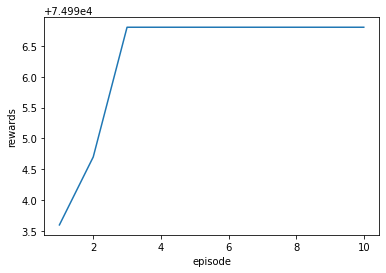

<IPython.core.display.Javascript object>

In [263]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(ev_qd_episode,ev_qd_rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

Stochastic Q Leraning

In [272]:
ev_qs_rewards = []
ev_qs_episode = []
episode = 10 

#repeat for each episode 
for ep in range(1,episode+1):

  #observe the initial state s 
  obs = qs_env.reset()
  done = False
  
  cumulative_rewards = 0
  #repeat for each step of episode
  while not done:

    state = 4*obs[0] + obs[1]
    #select an action a from state s(e.g. epsilon-greedy) and execute it
    action = np.argmax(Q[state,:]) #exploit

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = qs_env.step(action)
    
    #Update the table entry for Q(s,a) as follows:
    next_state = 4*next_obs[0]+next_obs[1]
    Q[state,action] = Q[state,action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state,action])
    cumulative_rewards += reward
    obs = next_obs


  print("--------------------------------")  
  print('episode:',ep)  
  print('epsilon:',epsilon)
  print('rewards:',cumulative_rewards)
    
  ev_qs_episode.append(ep)
  ev_qs_rewards.append(cumulative_rewards)
  
    

qs_env.close()


--------------------------------
episode: 1
epsilon: 0.006570483042414605
rewards: 59.29999999999999
--------------------------------
episode: 2
epsilon: 0.006570483042414605
rewards: 113.00000000000023
--------------------------------
episode: 3
epsilon: 0.006570483042414605
rewards: 7.6
--------------------------------
episode: 4
epsilon: 0.006570483042414605
rewards: 17.40000000000001
--------------------------------
episode: 5
epsilon: 0.006570483042414605
rewards: 32.300000000000004
--------------------------------
episode: 6
epsilon: 0.006570483042414605
rewards: 133.4000000000001
--------------------------------
episode: 7
epsilon: 0.006570483042414605
rewards: 10.4
--------------------------------
episode: 8
epsilon: 0.006570483042414605
rewards: 16.4
--------------------------------
episode: 9
epsilon: 0.006570483042414605
rewards: 18.9
--------------------------------
episode: 10
epsilon: 0.006570483042414605
rewards: 10.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

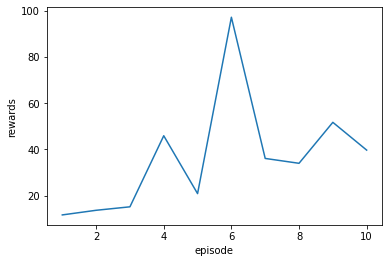

<IPython.core.display.Javascript object>

In [271]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(ev_qs_episode,ev_qs_rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

Deterministic SARSA

In [287]:
ev_sd_rewards = []
ev_sd_episode = []
episode = 10 

#repeat for each episode 
for ep in range(1,episode+1):

  #observe the initial state s 
  obs = sd_env.reset()
  done = False
  
  state = 4*obs[0] + obs[1]
  #Choose A from S using policy derived from Q(e-greedy)
  action = np.random.choice(action_space.n) #exploration

  cumulative_rewards = 0
  #repeat for each step of episode
  while not done:

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = sd_env.step(action)

    next_state = 4*next_obs[0]+next_obs[1]
    #select an action' a from state s'(e.g. epsilon-greedy) and execute it
    next_action = np.random.choice(action_space.n) #exploration

    #Update the table entry for Q(s,a) as follows:
    
    Q[state,action] = Q[state,action] + alpha*(reward + gamma*Q[next_state,next_action] - Q[state,action])
    cumulative_rewards += reward
    obs = next_obs
    action = next_action
    
  print("--------------------------------")  
  print('episode:',ep)  
  print('epsilon:',epsilon)
  print('rewards:',cumulative_rewards)
  
  ev_sd_episode.append(ep)
  ev_sd_rewards.append(cumulative_rewards)
  
    

sd_env.close()


--------------------------------
episode: 1
epsilon: 0.006570483042414605
rewards: 9.2
--------------------------------
episode: 2
epsilon: 0.006570483042414605
rewards: 5.699999999999999
--------------------------------
episode: 3
epsilon: 0.006570483042414605
rewards: 33.09999999999988
--------------------------------
episode: 4
epsilon: 0.006570483042414605
rewards: 16.300000000000004
--------------------------------
episode: 5
epsilon: 0.006570483042414605
rewards: 19.300000000000004
--------------------------------
episode: 6
epsilon: 0.006570483042414605
rewards: 30.299999999999983
--------------------------------
episode: 7
epsilon: 0.006570483042414605
rewards: 10.399999999999999
--------------------------------
episode: 8
epsilon: 0.006570483042414605
rewards: 35.49999999999995
--------------------------------
episode: 9
epsilon: 0.006570483042414605
rewards: 23.6
--------------------------------
episode: 10
epsilon: 0.006570483042414605
rewards: 11.2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

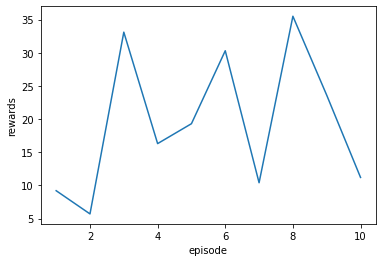

<IPython.core.display.Javascript object>

In [288]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(ev_sd_episode,ev_sd_rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

Stochastic SARSA

In [281]:
ev_ss_rewards = []
ev_ss_episode = []
episode = 10 

#repeat for each episode 
for ep in range(1,episode+1):

  #observe the initial state s 
  obs = ss_env.reset()
  done = False
  
  state = 4*obs[0] + obs[1]
  #Choose A from S using policy derived from Q(e-greedy)
  action = np.random.choice(action_space.n) #exploration

  cumulative_rewards = 0
  #repeat for each step of episode
  while not done:

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = ss_env.step(action)

    next_state = 4*next_obs[0]+next_obs[1]
    #select an action' a from state s'(e.g. epsilon-greedy) and execute it
    next_action = np.random.choice(action_space.n) #exploration

    #Update the table entry for Q(s,a) as follows:
    
    Q[state,action] = Q[state,action] + alpha*(reward + gamma*Q[next_state,next_action] - Q[state,action])
    cumulative_rewards += reward
    obs = next_obs
    action = next_action
    
  print("--------------------------------")  
  print('episode:',ep)  
  print('epsilon:',epsilon)
  print('rewards:',cumulative_rewards)
  
  ev_ss_episode.append(ep)
  ev_ss_rewards.append(cumulative_rewards)
  
    

ss_env.close()


--------------------------------
episode: 1
epsilon: 0.006570483042414605
rewards: 40.1
--------------------------------
episode: 2
epsilon: 0.006570483042414605
rewards: 9.200000000000001
--------------------------------
episode: 3
epsilon: 0.006570483042414605
rewards: 13.3
--------------------------------
episode: 4
epsilon: 0.006570483042414605
rewards: 41.49999999999994
--------------------------------
episode: 5
epsilon: 0.006570483042414605
rewards: 12.3
--------------------------------
episode: 6
epsilon: 0.006570483042414605
rewards: 28.300000000000004
--------------------------------
episode: 7
epsilon: 0.006570483042414605
rewards: 15.9
--------------------------------
episode: 8
epsilon: 0.006570483042414605
rewards: 30.799999999999976
--------------------------------
episode: 9
epsilon: 0.006570483042414605
rewards: 10.7
--------------------------------
episode: 10
epsilon: 0.006570483042414605
rewards: 66.79999999999993


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

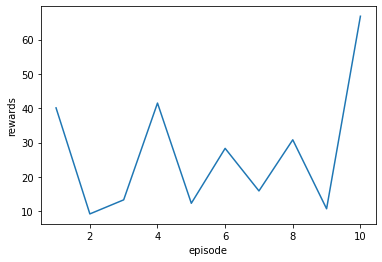

<IPython.core.display.Javascript object>

In [282]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(ev_ss_episode,ev_ss_rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

##8.Compare two models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

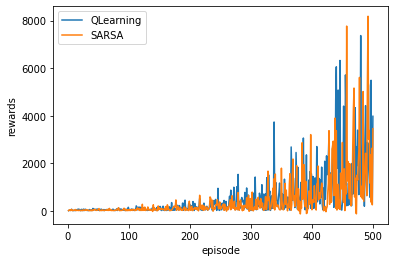

<IPython.core.display.Javascript object>

In [187]:
#compare rewards per episode(qlearning and sarsa for deterministic environment)
with output_grid.output_to(0, 0):
  plt.plot(q_d_episode_list,q_d_rewards,label='QLearning')
  plt.plot(s_d_episode_list,s_d_rewards,label='SARSA')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

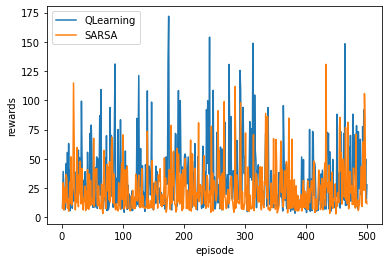

<IPython.core.display.Javascript object>

In [188]:
#compare rewards per episode(qlearning and sarsa for stochastic environment)
with output_grid.output_to(0, 0):
  plt.plot(q_s_episode_list,q_s_rewards,label='QLearning')
  plt.plot(s_s_episode_list,s_s_rewards,label='SARSA')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()